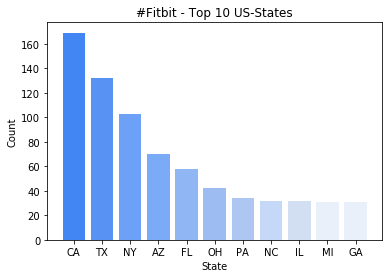

In [1]:
import pickle
import json
import collections
import matplotlib.pyplot as plt
from collections import Counter

input_data = pickle.load( open( "Fitbit_SMM_TweetsData.pkl", "rb" ) )
count=0
PositiveCount = 0
NegativeCount = 0
NeutralCount = 0
state = []
for record in input_data:
    if 'place_full_name' in record.keys():
        Place = record["place_full_name"].split(",")
        if len(Place) > 1:
            if Place[1].strip() != 'USA':
                state.append(Place[1].strip())
    else:
        if 'place' in record.keys():
            Place = record["place"]["full_name"].split(",")
            if len(Place) > 1:
                if Place[1].strip() != 'USA':
                    state.append(Place[1].strip())


data = Counter(state)
data = {k: v for k, v in data.items() if v > 30}
data = collections.OrderedDict(sorted(data.items(), key=lambda t: t[1], reverse=True))
my_colors = ('#4286f4','#5893f4','#6ca1f7','#7baaf7','#90b6f4','#9dbdf2','#aec7f2','#c5d8f7','#d2def2','#eaf0f9','#eaf0f9')
plt.title("#Fitbit - Top 10 US-States")
plt.xlabel("State")
plt.ylabel("Count")
plt.bar(range(len(data)), data.values(), align='center', color = my_colors)
plt.xticks(range(len(data)), data.keys())

plt.show()